In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification

### 의사결정나무(Decision Tree)
- 분류와 회귀 분석에 사용되는 지도 학습 알고리즘입니다. 
- 데이터의 특징(feature)들을 기반으로 한 논리적인 의사결정 규칙들의 집합으로 이루어진 트리 형태의 모델을 구성합니다. 
- 각 내부 노드(internal node)는 특징의 값을 기반으로 데이터를 분할하고, 말단 노드(leaf node)는 예측값을 출력합니다.

- 의사결정나무의 작동 원리

    - 데이터 분할: 가장 먼저, 주어진 데이터셋을 가장 좋은 특징으로 분할합니다. 이때 분할은 각 특징의 값을 기준으로 이루어집니다. 분할은 데이터를 가장 잘 분류하는 기준을 찾는 과정입니다.

    - 특징 선택: 데이터 분할에 사용될 특징을 선택합니다. 이때 특징은 정보 이득(information gain)이나 지니 불순도(Gini impurity)와 같은 측정 지표를 사용하여 선택됩니다. 이 측정 지표는 분할 전후의 데이터 집합의 불확실성을 측정하여, 분할이 얼마나 정보를 얻을 수 있는지를 나타냅니다.

    - 트리 생성: 선택된 특징을 기준으로 데이터를 분할하여 하위 노드를 생성합니다. 이 과정을 재귀적으로 반복하여 트리를 계속 구성합니다. 분할은 불순도를 최소화하거나 정보 이득을 최대화하는 방향으로 수행됩니다.

    - 트리 가지치기: 트리 생성 과정에서 과적합(overfitting)을 방지하기 위해 가지치기(pruning)를 수행합니다. 가지치기는 트리의 복잡성을 줄이는 과정으로, 불필요한 분기를 제거하거나 병합하여 모델을 간소화합니다.

    - 예측: 생성된 의사결정나무를 사용하여 새로운 데이터의 예측값을 도출합니다. 이때 입력 데이터는 트리의 루트 노드부터 시작하여 하위 노드를 따라가며 예측값을 결정합니다. 말단 노드에 도달하면 해당 노드의 클래스 레이블이 예측값으로 반환됩니다.

- 직관적이고 해석하기 쉬운 모델로서, 다양한 장단점을 가지고 있습니다.

- 장점:

    - 해석력: 의사결정나무는 각 분기와 조건에 대해 직관적으로 해석이 가능합니다. 트리의 구조를 시각화하거나 규칙들을 해석함으로써 데이터의 특징과 의미를 이해할 수 있습니다.

    - 특징 중요도: 의사결정나무는 특징의 중요도를 추정하는 데 도움을 줍니다. 특징이 데이터를 분할하는 데 얼마나 큰 영향을 주는지를 파악할 수 있으며, 이를 활용하여 변수 선택이나 특징 엔지니어링에 유용합니다.

    - 비선형 관계 모델링: 의사결정나무는 데이터 내의 비선형 관계를 모델링할 수 있습니다. 선형 분류 모델보다 더 복잡한 패턴을 인식하고 학습할 수 있습니다.

    - 이상치에 강건함: 의사결정나무는 이상치(outlier)에 상대적으로 강건한 모델입니다. 이상치가 다른 영역으로 분리될 수 있는 특징을 갖고 있다면, 의사결정나무는 이를 감지하고 해당 영역을 분리하는 분기를 생성할 수 있습니다.

- 단점:

    - 과적합 경향: 의사결정나무는 데이터의 작은 변화에도 민감하게 반응할 수 있으며, 과적합 문제가 발생할 수 있습니다. 과적합을 방지하기 위해 가지치기 기법이 사용되지만, 완벽한 방지는 어려울 수 있습니다.

    - 클래스 불균형 문제: 클래스가 불균형하게 분포되어 있는 경우, 의사결정나무는 예측력이 약할 수 있습니다. 이는 트리의 구조가 클래스의 빈도에 크게 영향을 받기 때문입니다.

    - 관련성이 없는 특징 처리: 의사결정나무는 특징들 간의 독립성을 가정합니다. 관련성이 없는 특징이 포함된 경우, 모델의 성능이 저하될 수 있습니다.

    - 데이터의 작은 변화에 민감함: 입력 데이터의 작은 변화에도 트리 구조가 크게 변경될 수 있습니다. 이는 트리의 안안정성과 일반화 능력에 영향을 줄 수 있습니다. 즉, 입력 데이터가 약간 변경될 경우 트리의 구조가 크게 달라질 수 있으므로, 데이터의 작은 변화에 민감하게 반응할 수 있습니다.

    - 고차원 데이터 처리 어려움: 의사결정나무는 고차원 데이터에 대한 처리가 어려울 수 있습니다. 특히 특징의 개수가 많아지면 트리의 깊이가 깊어지고 복잡한 모델이 생성될 수 있으며, 이는 모델의 해석과 계산 비용 증가로 이어질 수 있습니다.

    - 데이터 부족 문제: 데이터가 부족한 경우 의사결정나무의 성능이 저하될 수 있습니다. 충분한 데이터가 없으면 트리의 분기를 충분히 확장할 수 없으며, 모델의 일반화 능력이 제한될 수 있습니다.

    - 연속적인 특징 처리 어려움: 의사결정나무는 연속적인 특징을 처리하기 어렵습니다. 보통은 특정 임계값을 기준으로 이진 분할을 수행하므로, 연속적인 값에 대해서는 이산적인 값으로 변환해야 합니다.

### 지니 지수(Gini Index)와 정보 이득 지수(Information Gain)
- 의사결정나무에서 특징 선택에 사용되는 지표입니다. 이 두 지표는 데이터의 분할을 평가하여 어떤 특징이 분할에 가장 유용한지를 결정하는 데 도움을 줍니다.
- 지니 지수 (Gini Index):
    - 데이터의 불순도를 측정하는 지표입니다. 의사결정나무에서는 특정 특징을 기준으로 데이터를 분할할 때, 각 분할된 영역의 지니 지수를 계산하고, 이를 최소화하는 방향으로 분할을 수행합니다.
    - 0부터 1까지의 값을 가지며, 0에 가까울수록 데이터가 순수하게 분류되었음을 의미합니다. 지니 지수는 다음과 같이 계산됩니다:
    - Gini Index = 1 - (클래스 1의 비율)^2 - (클래스 2의 비율)^2 - ... - (클래스 n의 비율)^2
    - 예를 들어, 이진 분류 문제에서 지니 지수를 계산하려면 클래스 1과 클래스 2의 비율을 알아야 합니다. 비율이 균등하다면 지니 지수는 최대값인 0.5를 가지며, 한 클래스에 대한 비율이 1이고 다른 클래스에 대한 비율이 0이면 지니 지수는 0이 됩니다.
- 정보 이득 지수 (Information Gain):
    - 정보 이득 지수는 데이터 분할 전후의 불확실성 감소를 측정하는 지표입니다. 정보 이득 지수는 분할 전의 불확실성과 분할 후의 불확실성의 차이로 계산됩니다. 의사결정나무에서는 가능한 모든 특징에 대해 정보 이득 지수를 계산하고, 가장 높은 정보 이득을 가지는 특징을 선택하여 분할을 수행합니다.
    - information Gain = 전체 데이터의 엔트로피 - (특정 특징에 대한 가중 평균 엔트로피) = 정보 이득 지수 = 1- 엔트로피(혼잡도)지수
    - 여기서 엔트로피(Entropy)는 데이터의 불확실성을 측정하는 지표로 사용됩니다. 엔트로피 값은 0에 가까울수록 데이터가 순수하게 분류되었음을 의미합니다.
    - 분할 전후의 불확실성을 비교하여 정보 이득이 높은 특징을 선택하는 것이 목표입니다. 정보 이득이 높은 특징은 해당 특징을 기준으로 데이터를 분할할 때 클래스의 불확실성을 가장 많이 감소시킬 수 있는 특징입니다.
- 지니 지수와 정보 이득 지수는 의사결정나무에서 특징 선택에 사용되는 두 가지 주요 지표입니다. 둘 다 데이터의 불확실성을 측정하여 분할에 대한 평가를 도와줍니다. 그러나 지니 지수는 분류 작업에 더 효과적이고 정보 이득 지수는 분류와 회귀 작업 모두에 사용될 수 있습니다.

- 의사결정나무에서는 주어진 데이터셋에서 모든 가능한 특징에 대해 지니 지수나 정보 이득 지수를 계산한 후, 최적의 분할을 결정하기 위해 가장 높은 지표를 선택합니다. 이를 반복하여 트리를 구성하고, 이를 통해 새로운 데이터의 예측을 수행할 수 있습니다.

- 정보 이득과 지니 지수는 특징 선택에 사용되는 지표로서 데이터의 분할을 평가하는 데 도움을 주지만, 어떤 지표를 선택할지는 문제의 특성과 사용자의 목적에 따라 달라질 수 있습니다.

In [23]:
dt_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 156)
#dt_clf = DecisionTreeClassifier(criterion = "gini", min_samples_split = 4, random_state = 156)
#dt_clf = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 4, random_state = 156)
#dt_clf = DecisionTreeClassifier(criterion = "gini", random_state = 156)

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

### classification_report
- 분류 모델의 성능을 평가하기 위한 지표들을 종합적으로 제공하는 보고서
- support : 각 클래스에 속한 실제 샘플의 개수
- Macro Avg : 각 클래스의 단순한 평균값
- Weighted Avg : 각 클래스의 가중 평균값

In [24]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
creport = classification_report(y_test, pred)

print(f"결정 트리 예측 정확도 : {accuracy: .4f}")
print(f"classification report : \n{creport}")

결정 트리 예측 정확도 :  0.9333
classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



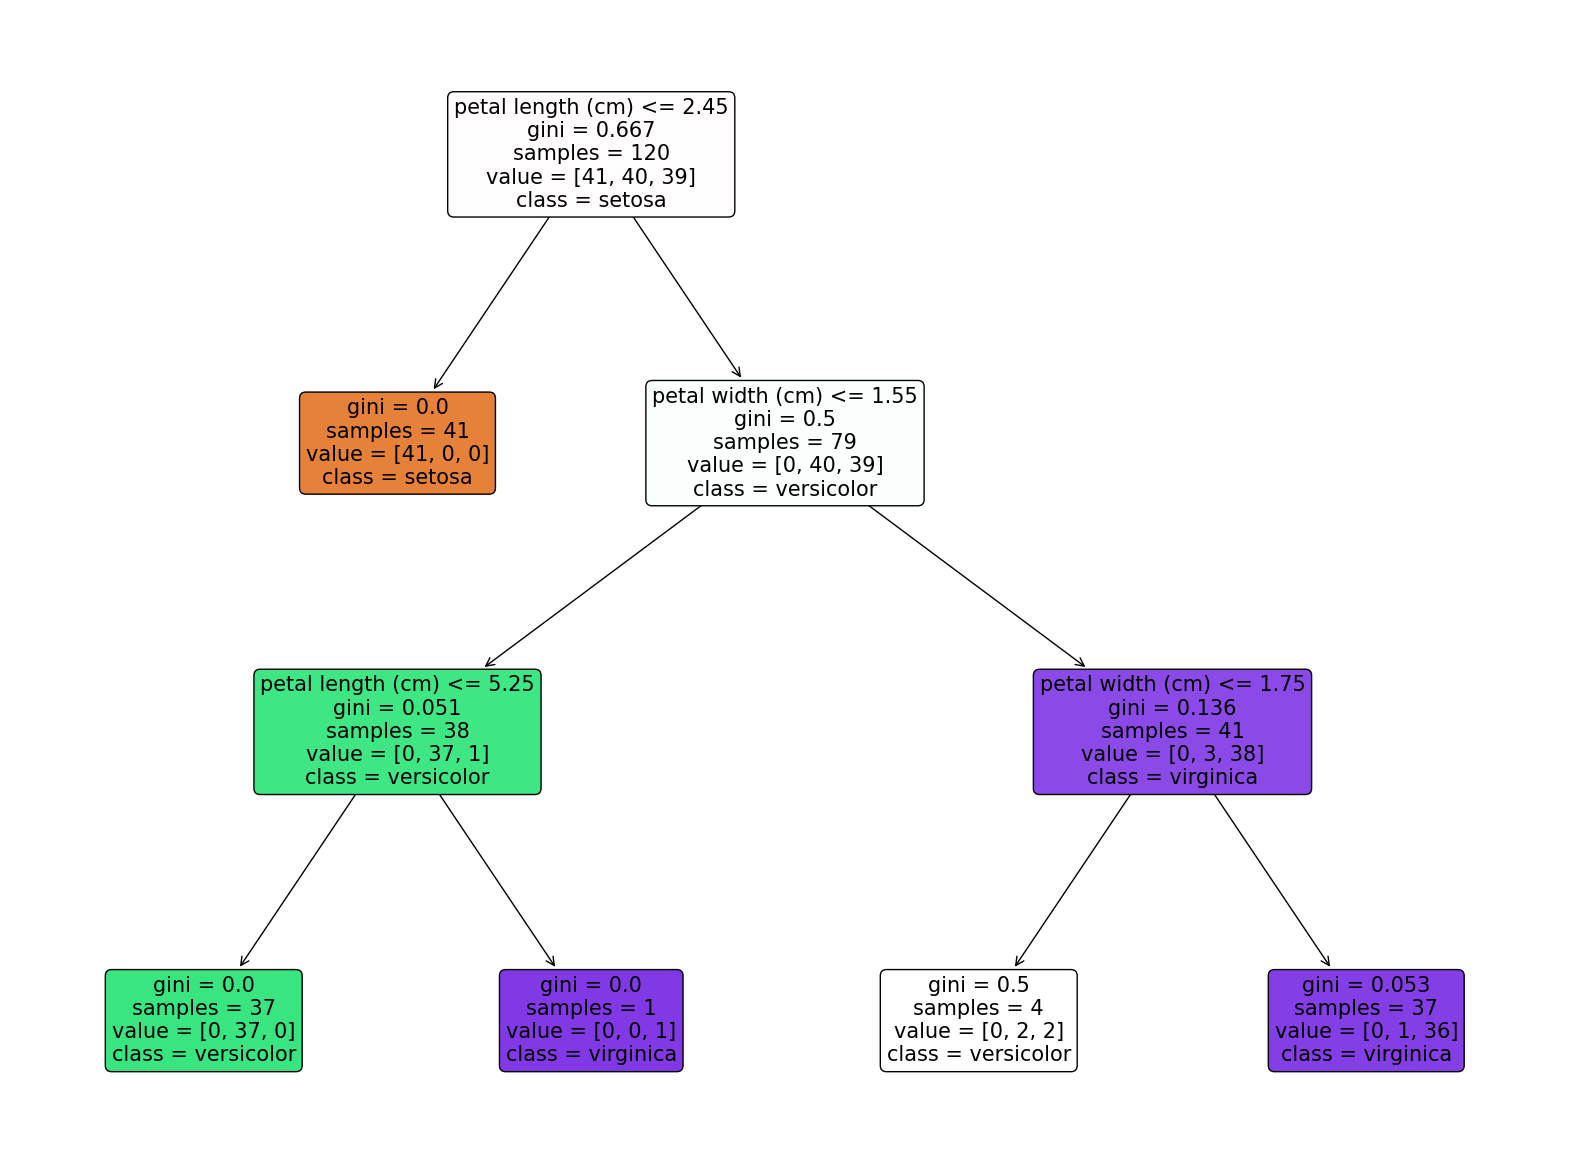

In [26]:
# DT 시각화
# gini 계수는 엔트로피와 마찬가지로 낮을수록 분류가 잘 된 것으로 판단하며 기본적으로 의사결정 나무는
# 이 information Gain을 낮추는 방향을 분류를 진행

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled = True,
              feature_names = iris_data.feature_names,
              class_names = iris_data.target_names,
              rounded = True, fontsize = 15)

plt.show()

Feature importances : 
 [0.    0.    0.558 0.442]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<AxesSubplot:>

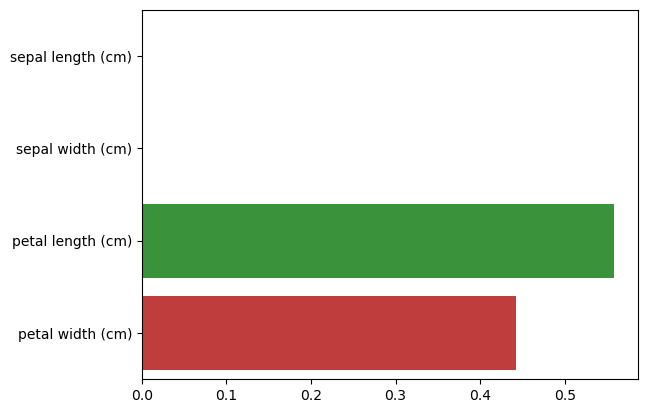

In [28]:
print(f"Feature importances : \n {np.round(dt_clf.feature_importances_, 3)}")

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f"{name} : {value:.3f}")
    
sns.barplot(x = dt_clf.feature_importances_ , y = iris_data.feature_names)

## 결정 트리(Decision TREE) 과적합(Overfitting)

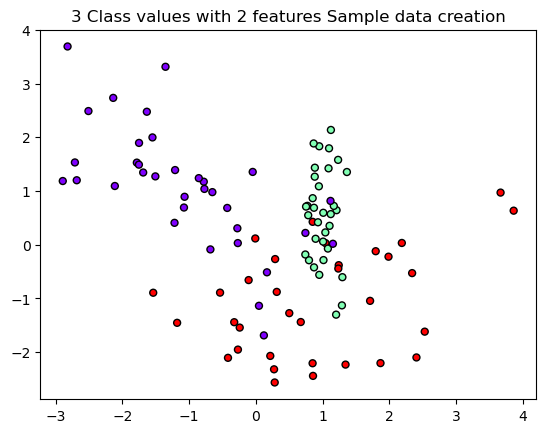

In [30]:
plt.title("3 Class values with 2 features Sample data creation")

X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

plt.scatter(X_features[:,0], X_features[:,1], marker = "o", c = y_labels, s = 25, cmap = "rainbow", edgecolor = "k")

In [31]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

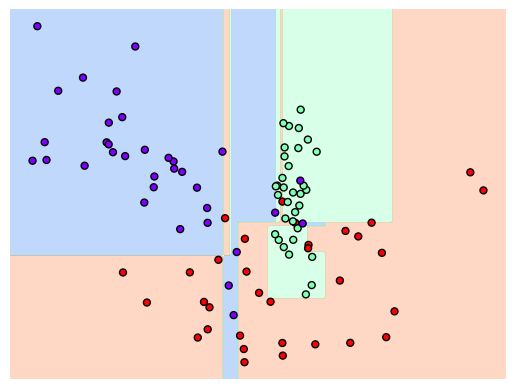

In [33]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

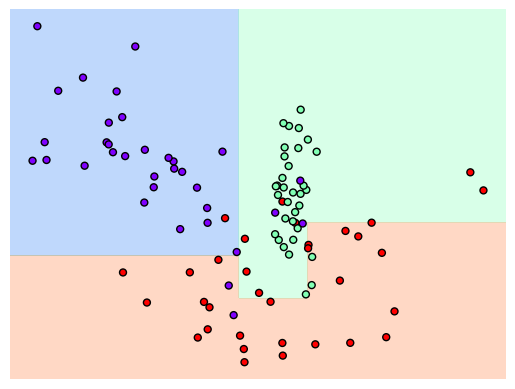

In [34]:
dt_clf = DecisionTreeClassifier(min_samples_leaf= 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)